In [6]:
#importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Loading the data

In [4]:
df=pd.read_csv("diabetes (2).csv")

# EDA

In [5]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

# Data Processing

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

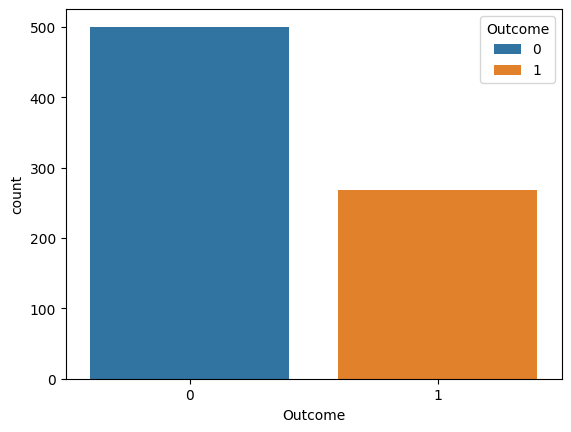

In [5]:
sns.countplot(x='Outcome',data=df,hue='Outcome')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualization

<Axes: ylabel='Count'>

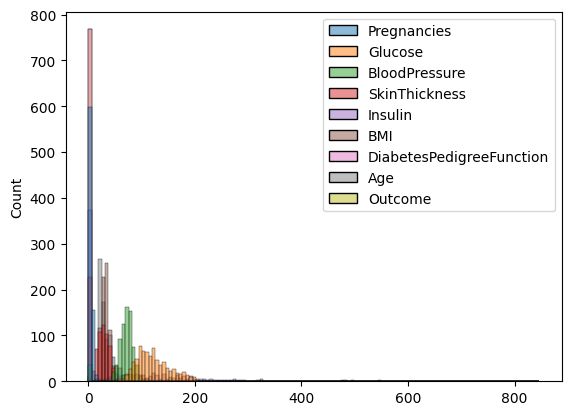

In [7]:
sns.histplot(data=df)

# Outlier Deection 

<Axes: >

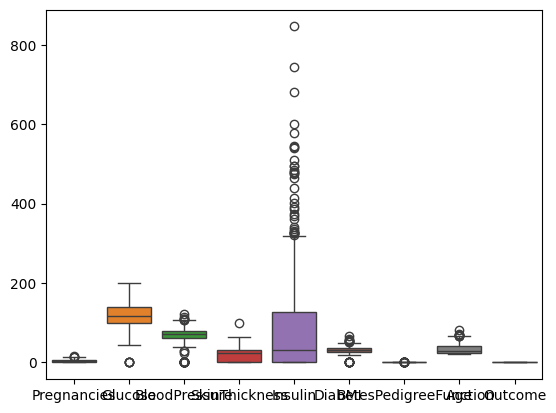

In [8]:
sns.boxplot(data=df)

<Axes: xlabel='Insulin'>

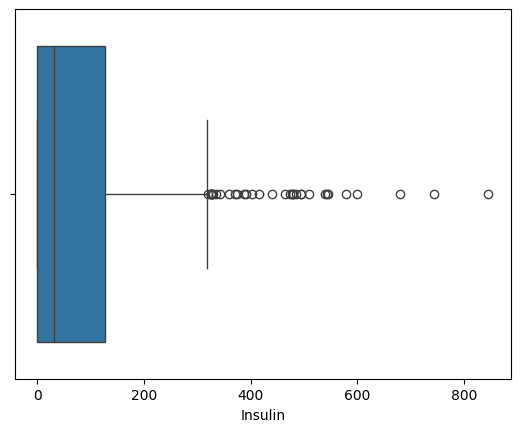

In [9]:
sns.boxplot(data=df,x='Insulin')

In [10]:
#outlier removal in insulin
Q1=np.percentile(df['Insulin'],25)
Q3=np.percentile(df['Insulin'],75)
IQR=Q3-Q1
IQR

127.25

In [11]:
upper=np.where(df['Insulin']>=Q3+1.5*IQR)

In [12]:
lower=np.where(df['Insulin']<=Q1-1.5*IQR)

In [13]:
upper

(array([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
        286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
        612, 645, 655, 695, 707, 710, 715, 753], dtype=int64),)

In [14]:
lower

(array([], dtype=int64),)

In [15]:
df.drop(upper[0],inplace=True)

In [16]:
df.drop(lower[0],inplace=True)

<Axes: xlabel='Insulin'>

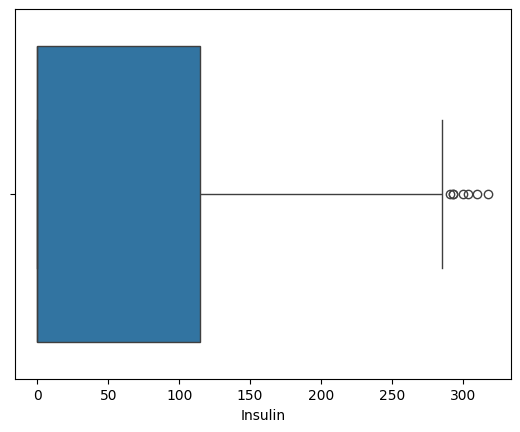

In [17]:
sns.boxplot(data=df,x='Insulin')

# Model Creation 

In [18]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 734, dtype: int64

In [19]:
x=df.drop(['Outcome'],axis=1)

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit(x)

StandardScaler()

In [23]:
std_data=scaler.transform(x)
std_data

array([[ 0.63831459,  0.92230173,  0.15354684, ...,  0.22061072,
         0.49738548,  1.43631516],
       [-0.84060873, -1.09401241, -0.15257371, ..., -0.66389796,
        -0.36016635, -0.18666744],
       [ 1.22988392,  2.04247626, -0.25461389, ..., -1.08088062,
         0.63720371, -0.1012473 ],
       ...,
       [ 0.34252992,  0.0581671 ,  0.15354684, ..., -0.71444131,
        -0.68951596, -0.27208757],
       [-0.84060873,  0.21819203, -0.45869426, ..., -0.22164362,
        -0.36638049,  1.18005475],
       [-0.84060873, -0.83797252,  0.05150666, ..., -0.18373611,
        -0.47202093, -0.87002853]])

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2,stratify=y)
print(xtrain.shape,xtest.shape,x)

(587, 8) (147, 8)      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                  

In [28]:
#training the model
classifier=svm.SVC(kernel='linear')
#training SVM classifier
classifier.fit(xtrain,ytrain)

SVC(kernel='linear')

In [29]:
#accuracy score on the training data
xtrain_predict=classifier.predict(xtrain)
xtrain_accuracy=accuracy_score(xtrain_predict,ytrain)
xtrain_accuracy

0.7717206132879046

In [30]:
#accuracy score on the testing data
xtest_predict=classifier.predict(xtest)
xtest_accuracy=accuracy_score(xtest_predict,ytest)
xtest_accuracy

0.8095238095238095

# Model Testing & Evaluation 

In [33]:
newdata=(4,110,92,0,0,37.6,0.191,30)
newdatanp=np.asarray(newdata)
newdatareshaped=newdatanp.reshape(1,-1)
prediction=classifier.predict(newdatareshaped)
prediction

C:\Users\CMT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
if prediction[0]==1:
    print("Person is Diabetical")
else:
    print("person is not Diabetical")

person is not Diabetical
